In [13]:
from datetime import datetime

import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/nccgroup/Splunking-Crime/master/Splunk_SA_Scientific_Python_darwin_x86_64/bin/darwin_x86_64/lib/python2.7/site-packages/statsmodels/datasets/co2/co2.csv')

In [11]:
data.dtypes

date      int64
co2     float64
dtype: object

In [18]:
data.date = pd.to_datetime(data.date.astype(str), format = "%Y%m%d")

In [19]:
data.index = data.date

In [21]:
data.drop('date', axis = 1, inplace = True)

In [23]:
y = data

In [24]:
y = y['co2'].resample('MS').mean()

In [25]:
y = y.fillna(y.bfill())
print(y)

date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


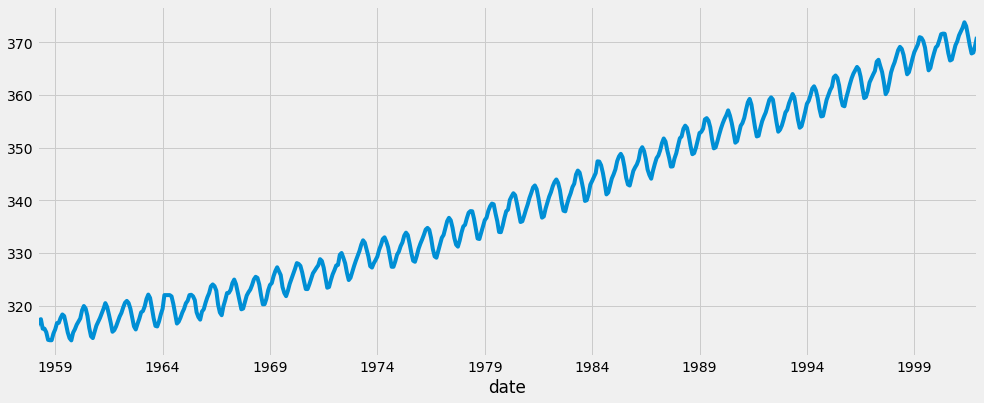

In [26]:
y.plot(figsize=(15, 6))
plt.show()

In [57]:
# Определите p, d и q в диапазоне 0-2
p = d = q = range(0, 2)
# Сгенерируйте различные комбинации p, q и q
pdq = list(itertools.product(p, d, q))
# Сгенерируйте комбинации сезонных параметров p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [39]:
warnings.filterwarnings("ignore") 

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624041281
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.828234141261
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727643685
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320035
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878317646387
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578978075545
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912883094
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048755626609
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327746026
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067396783
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716855446
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1093.1111724772934
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:822.009378645168
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893617242
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988297636
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194066


## Fitting an ARIMA Time Series Model:

In [40]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.163      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.812      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


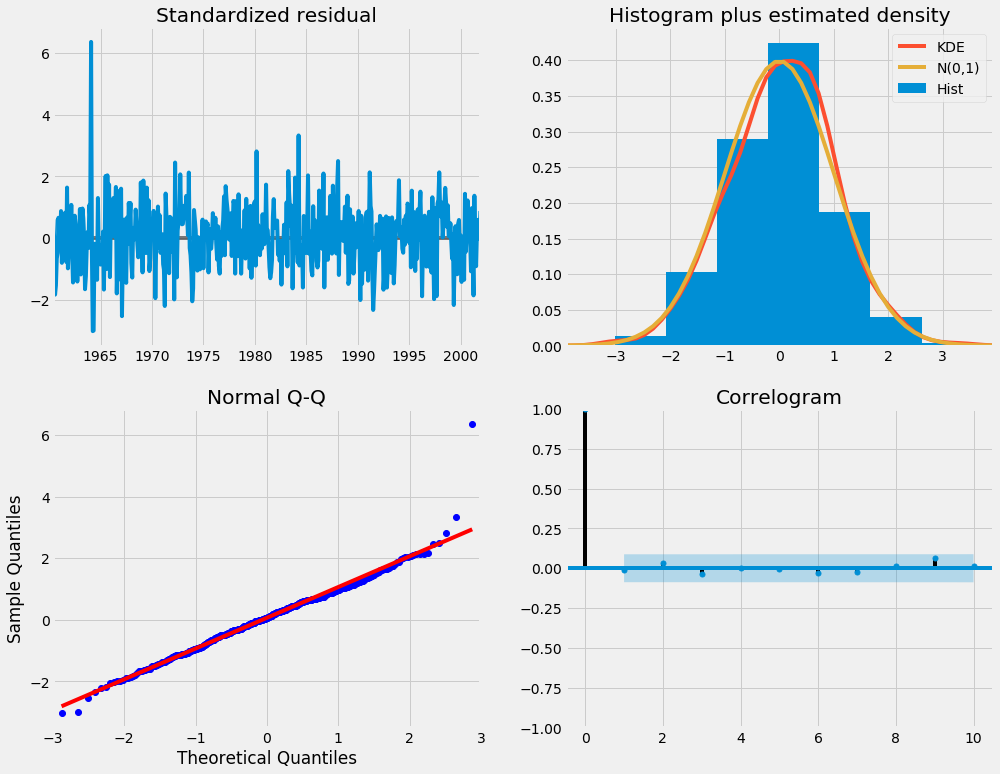

In [41]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [43]:
pred_ci

,lower co2,upper co2
date,,
1998-01-01,364.453366,365.675240
1998-02-01,365.373501,366.595376
1998-03-01,366.404743,367.626617
1998-04-01,367.908500,369.130374
1998-05-01,368.389523,369.611396
1998-06-01,367.802555,369.024428
1998-07-01,366.481985,367.703858
1998-08-01,364.754334,365.976207
1998-09-01,363.200085,364.421958


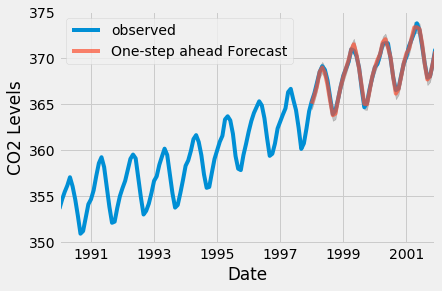

In [44]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

In [49]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mape = ((y_forecasted - y_truth).mean() / y_truth.mean())
print('MAPE of our forecasts is {}'.format(round(mape, 9)))

MAPE of our forecasts is -6.2314e-05


In [50]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [51]:
pred_dynamic_ci

,lower co2,upper co2
date,,
1998-01-01,364.453366,365.675240
1998-02-01,365.050230,366.536663
1998-03-01,365.874953,367.529658
1998-04-01,367.090571,368.883000
1998-05-01,367.550512,369.466509
1998-06-01,366.824201,368.854986
1998-07-01,365.234707,367.373747
1998-08-01,363.143038,365.384994
1998-09-01,361.355754,363.696071


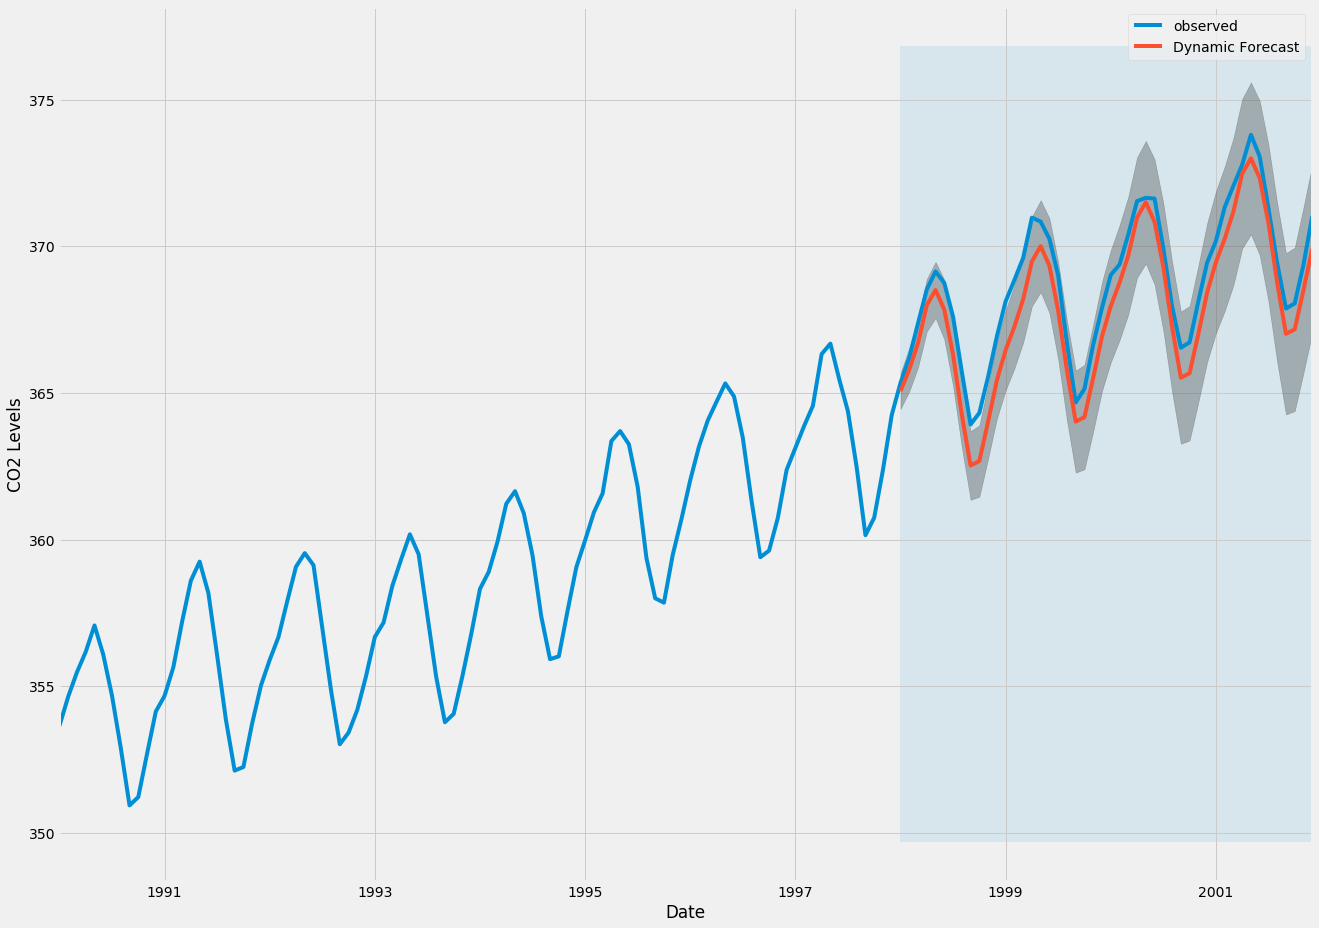

In [52]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
pred_dynamic_ci.iloc[:, 0],
pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

In [54]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


## Producing and Visualizing Forecasts:

In [55]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

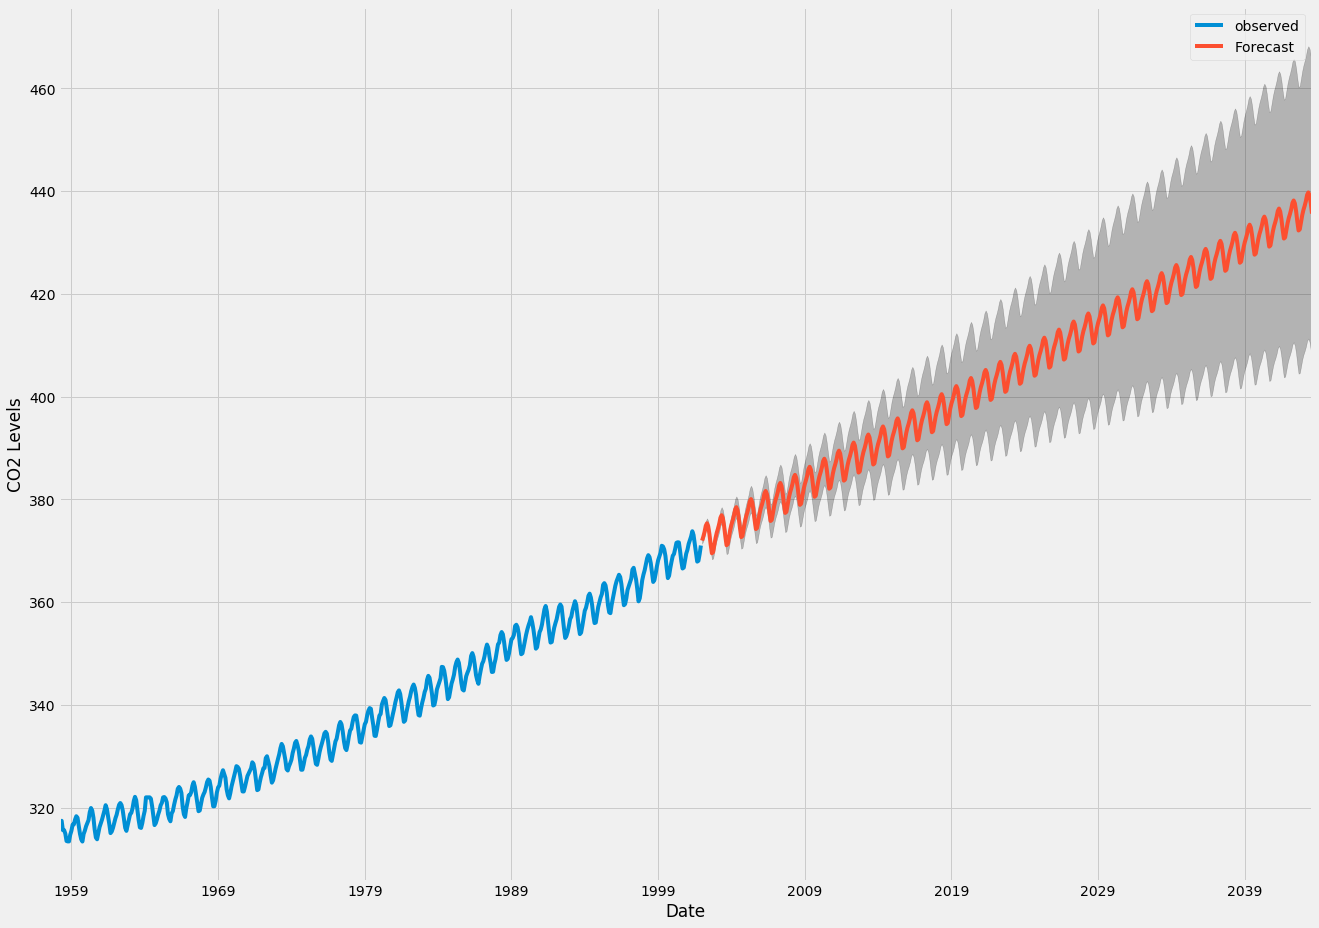

In [56]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()